In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os


In [5]:
zip_path = '/content/drive/MyDrive/data2.zip'

In [6]:
import zipfile

In [7]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [8]:
os.listdir('/content/data')

['Data']

In [11]:
!unzip /content/data/Data/raw_analyst_ratings.csv.zip -d /content/data/Data/

Archive:  /content/data/Data/raw_analyst_ratings.csv.zip
  inflating: /content/data/Data/raw_analyst_ratings.csv  


In [10]:
import pandas as pd

In [12]:
df = pd.read_csv('//content/data/Data/raw_analyst_ratings.csv')

# Step 2: Load the CSV File into a DataFrame

In [ ]:
import pandas as pd

df = pd.read_csv('//content/data/Data/raw_analyst_ratings.csv.zip')
# Display the first few rows of the DataFrame
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Step 3: Perform Descriptive Statistics
### 1. Basic Textual Length Statistics (Headline Lengths)

In [13]:
df['headline_length'] = df['headline'].apply(len)

# Display basic statistics for headline lengths
print(df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


# 2. Count Articles Per Publisher

Top Publishers by Article Count:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


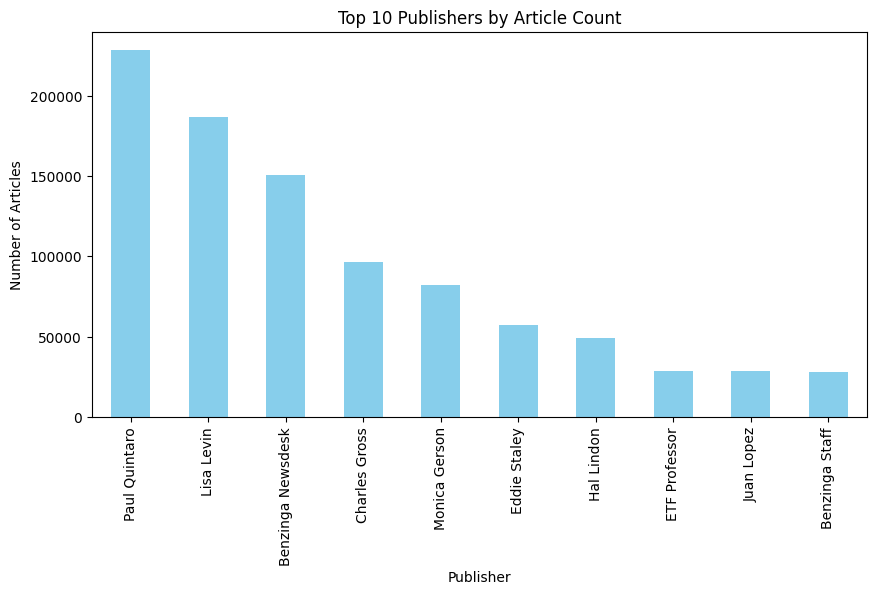

In [14]:
publisher_counts = df['publisher'].value_counts()

print("Top Publishers by Article Count:")
print(publisher_counts)

# Plot the top 10 publishers
import matplotlib.pyplot as plt

publisher_counts.head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()


# 3. Publication Date Trends
## Convert the date column to a datetime format and analyze trends over time:

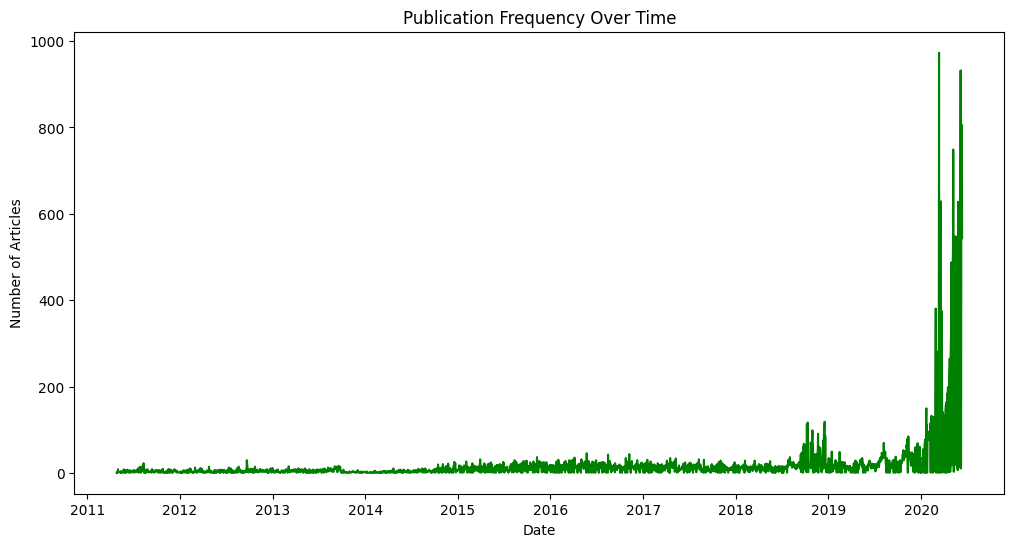

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# Count articles by date
date_counts = df['date'].dt.date.value_counts().sort_index()

# Plot publication frequency over time
date_counts.plot(figsize=(12, 6), color='green')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


# Step 4: Text Analysis (Sentiment Analysis & Topic Modeling)
# 1. Sentiment Analysis
We will use the nltk library for sentiment analysis.

# Install and Import nltk:

In [16]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Perform Sentiment Analysis on Headlines:

sentiment_category
Neutral     26075
Positive    16644
Negative    13268
Name: count, dtype: int64


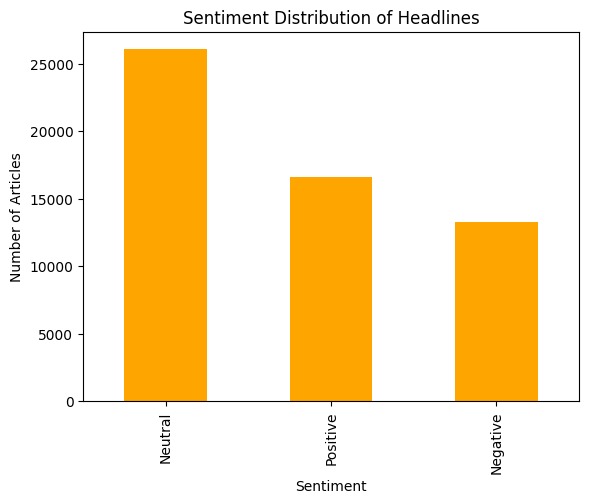

In [17]:
df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments as Positive, Negative, or Neutral
df['sentiment_category'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Display sentiment distribution
print(df['sentiment_category'].value_counts())

# Plot sentiment distribution
df['sentiment_category'].value_counts().plot(kind='bar', color='orange')
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()


# Topic Modeling (Extracting Keywords)
We will use CountVectorizer from scikit-learn to identify keywords.

# Import Libraries:

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['headline'].dropna())

# Display top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords in Headlines:", keywords)


Top Keywords in Headlines: ['52' 'companies' 'eps' 'estimate' 'higher' 'hit' 'lows' 'maintains'
 'market' 'new' 'price' 'q1' 'sales' 'session' 'shares' 'stocks' 'target'
 'trading' 'week' 'yesterday']


# Step 5: Time Series Analysis
# Publication Frequency Over Time

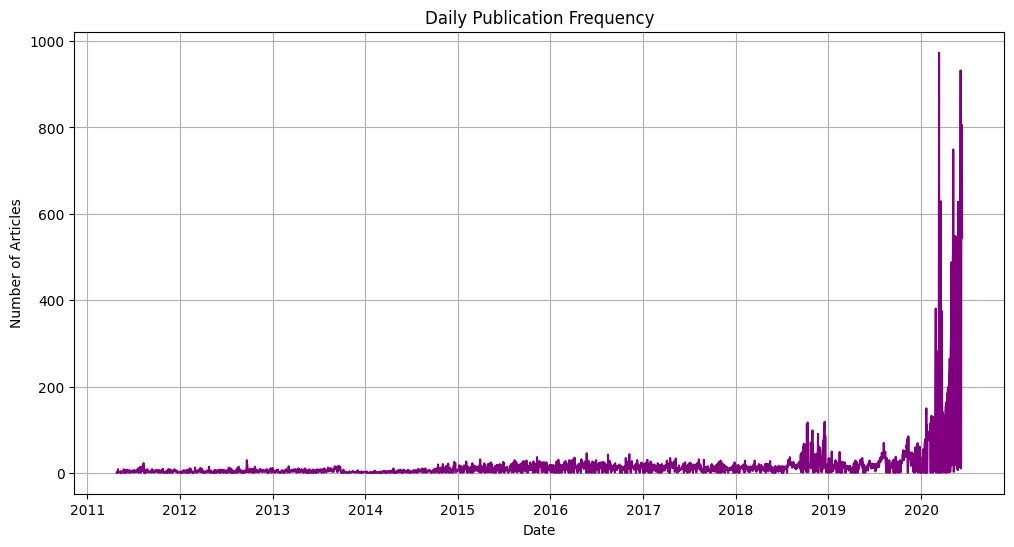

In [19]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
daily_counts = df['date'].dt.date.value_counts().sort_index()

# Plot publication frequency over time
daily_counts.plot(figsize=(12, 6), color='purple')
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


# Step 6: Publisher Analysis
Top Publishers and Unique Domains
# Count Top Publishers:

In [20]:
top_publishers = df['publisher'].value_counts().head(10)
print("Top Publishers:\n", top_publishers)


Top Publishers:
 publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


# If Emails Are Used as Publishers:

**Extract unique email domains if publishers are represented by email addresses:**

Top Email Domains:
 email_domain
benzinga.com    1196
gmail.com          3
Name: count, dtype: int64


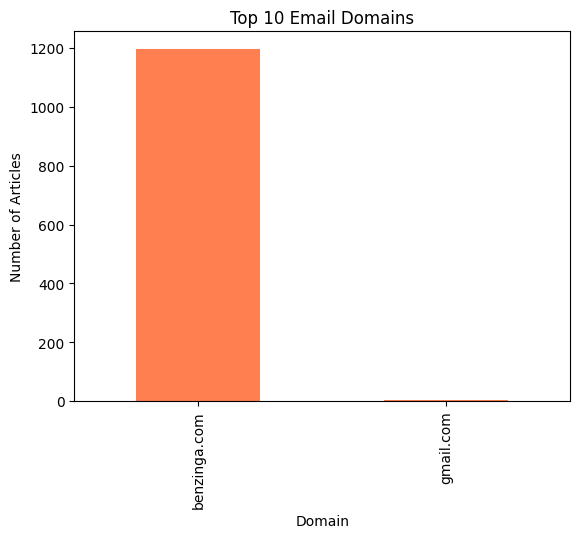

In [21]:
df['email_domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')

domain_counts = df['email_domain'].value_counts().dropna()
print("Top Email Domains:\n", domain_counts.head(10))

# Plot the top 10 domains
domain_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Email Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.show()


# Task 2: Quantitative Analysis using PyNance and TA-Lib

In [24]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2024-12-15 07:49:47--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:d95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.12.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-12-15 07:49:47--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:d95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://psychz.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-12-15 07:49:47--  http://psychz.dl.sourcefo

# Step 2: Import Libraries and Fetch Stock Data

In [25]:
!pip install pynance  # Install the 'pynance' module using pip
import pandas as pd
import pynance as pn  # Now you should be able to import 'pynance'
import talib
import matplotlib.pyplot as plt

# Fetch Stock Data Using PyNance:

In [26]:
# Fetch data for the past year
stock_data = pn.data.get('AAPL', start='2023-01-01', end='2024-01-01')

# Convert to DataFrame and display the first few rows
df = pd.DataFrame(stock_data)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2023-12-29,193.167,193.665,191.001,191.803,4.283407e+07
2023-12-28,193.406,193.925,192.440,192.848,3.417910e+07
2023-12-27,191.763,192.768,190.367,192.420,4.827016e+07
2023-12-26,192.878,193.157,192.101,192.320,2.902905e+07
2023-12-22,194.442,194.672,192.240,192.868,3.729054e+07


# Step 3: Calculate Technical Indicators with TA-Lib

Simple Moving Average (SMA):

In [27]:
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)


Relative Strength Index (RSI):

In [28]:
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)


MACD (Moving Average Convergence Divergence):

In [29]:
df['MACD'], df['MACD_signal'], _ = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


# Step 4: Visualize Data

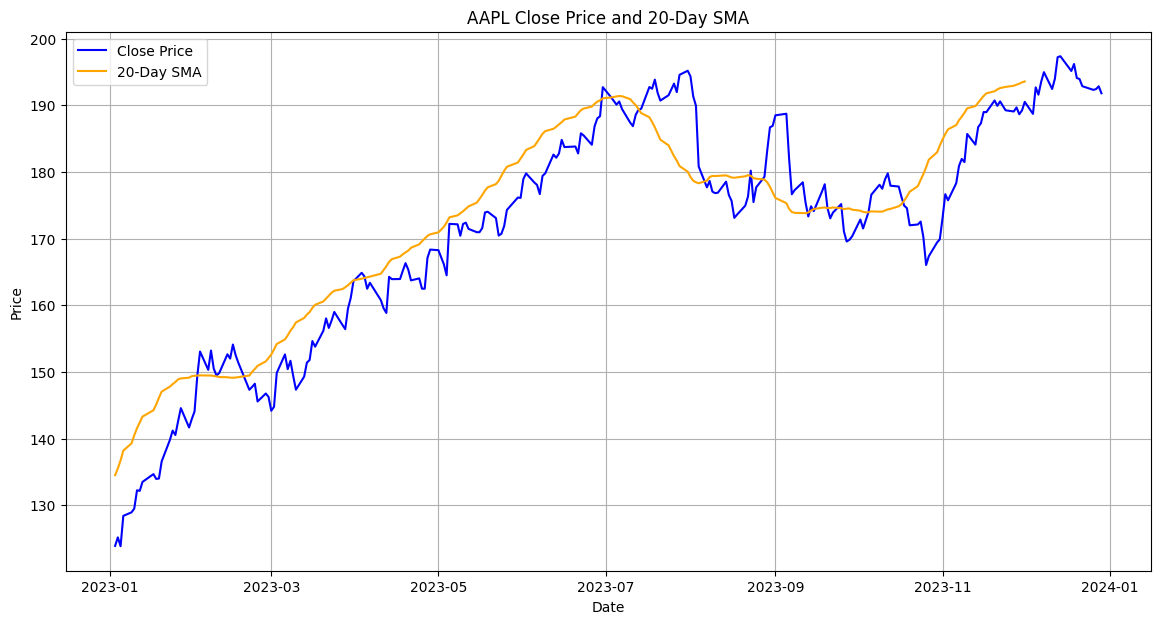

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_20'], label='20-Day SMA', color='orange')
plt.title('AAPL Close Price and 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Plot RSI (Relative Strength Index):

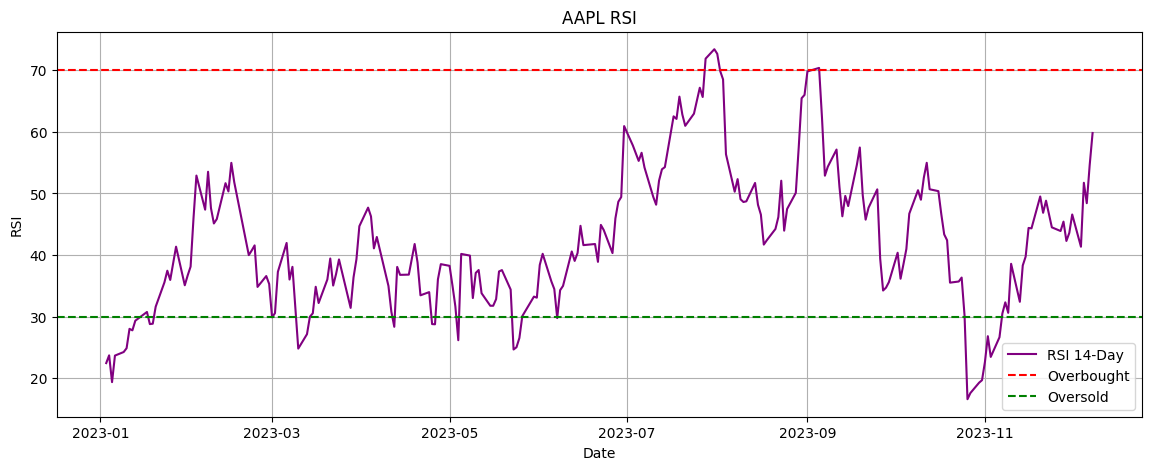

In [31]:
plt.figure(figsize=(14, 5))
plt.plot(df['RSI_14'], label='RSI 14-Day', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.title('AAPL RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


# Plot MACD and Signal Line:

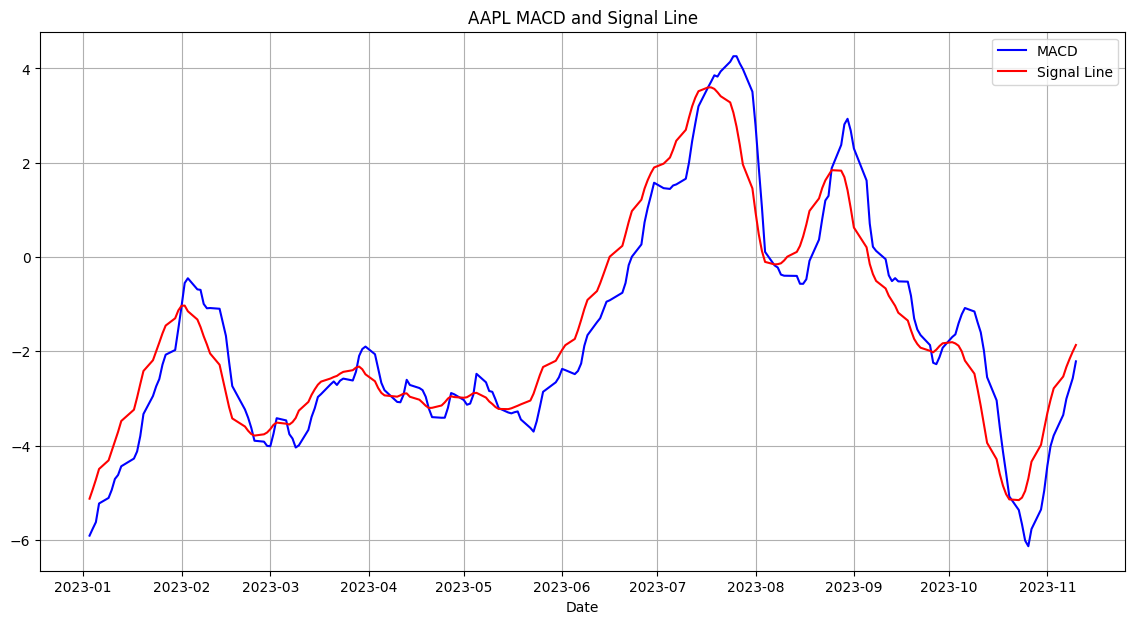

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='Signal Line', color='red')
plt.title('AAPL MACD and Signal Line')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


# Task 3

In [33]:
!unzip /content/data/Data/yfinance_data.zip -d /content/data/Data/


Archive:  /content/data/Data/yfinance_data.zip
   creating: /content/data/Data/yfinance_data/
  inflating: /content/data/Data/yfinance_data/GOOG_historical_data.csv  
  inflating: /content/data/Data/yfinance_data/MSFT_historical_data.csv  
  inflating: /content/data/Data/yfinance_data/AAPL_historical_data.csv  
  inflating: /content/data/Data/yfinance_data/AMZN_historical_data.csv  
  inflating: /content/data/Data/yfinance_data/META_historical_data.csv  
  inflating: /content/data/Data/yfinance_data/TSLA_historical_data.csv  
  inflating: /content/data/Data/yfinance_data/NVDA_historical_data.csv  


# Load and Inspect Data

In [34]:
import pandas as pd

# Load Google stock data as an example
goog_df = pd.read_csv('/content/data/Data/yfinance_data/GOOG_historical_data.csv')

# Inspect the first few rows
print(goog_df.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Load News Data

In [35]:
# Example news dataset structure
news_df = pd.DataFrame({
    'date': ['2023-01-02', '2023-01-02', '2023-01-03'],
    'headline': [
        'Google announces new AI tool for developers.',
        'Market reacts positively to Google’s new product launch.',
        'Tech stocks rally amid economic optimism.'
    ]
})


# Normalize Dates

In [36]:
news_df['date'] = pd.to_datetime(news_df['date']).dt.date
goog_df['Date'] = pd.to_datetime(goog_df['Date']).dt.date


# Sentiment Analysis on News Headlines

In [37]:
from textblob import TextBlob

# Function to compute sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each headline
news_df['sentiment_score'] = news_df['headline'].apply(get_sentiment)

# Display the news with sentiment scores
print(news_df)


         date                                           headline  \
0  2023-01-02       Google announces new AI tool for developers.   
1  2023-01-02  Market reacts positively to Google’s new produ...   
2  2023-01-03          Tech stocks rally amid economic optimism.   

   sentiment_score  
0         0.136364  
1         0.181818  
2         0.200000  


# Calculate Daily Stock Returns

In [38]:
goog_df['daily_return'] = goog_df['Close'].pct_change()
goog_df.dropna(inplace=True)  # Drop the first row with NaN

# Display the updated stock data
print(goog_df[['Date', 'Close', 'daily_return']])


            Date       Close  daily_return
1     2004-08-20    2.697639      0.079430
2     2004-08-23    2.724787      0.010064
3     2004-08-24    2.611960     -0.041408
4     2004-08-25    2.640104      0.010775
5     2004-08-26    2.687676      0.018019
...          ...         ...           ...
5015  2024-07-24  174.369995     -0.050272
5016  2024-07-25  169.160004     -0.029879
5017  2024-07-26  168.679993     -0.002838
5018  2024-07-29  171.130005      0.014525
5019  2024-07-30  171.860001      0.004266

[5019 rows x 3 columns]


# Merge News Sentiment with Stock Returns


In [39]:
# Merge sentiment scores with stock data
merged_df = pd.merge(news_df, goog_df[['Date', 'daily_return']], left_on='date', right_on='Date')

# Drop the redundant 'Date' column
merged_df.drop('Date', axis=1, inplace=True)

print(merged_df)


         date                                   headline  sentiment_score  \
0  2023-01-03  Tech stocks rally amid economic optimism.              0.2   

   daily_return  
0      0.010932  


# Aggregate Daily Sentiments

In [40]:
daily_sentiment = merged_df.groupby('date')['sentiment_score'].mean().reset_index()
daily_sentiment.rename(columns={'sentiment_score': 'avg_sentiment_score'}, inplace=True)

# Merge with daily returns
final_df = pd.merge(daily_sentiment, goog_df[['Date', 'daily_return']], left_on='date', right_on='Date')

# Drop the redundant 'Date' column
final_df.drop('Date', axis=1, inplace=True)

print(final_df)


         date  avg_sentiment_score  daily_return
0  2023-01-03                  0.2      0.010932


# Correlation Analysis

In [42]:
print(final_df['avg_sentiment_score'].unique())
print(final_df['daily_return'].unique())


[0.2]
[0.01093197]
